Future ideas:

Different categorical imputation techniques: One Hot, Target Encode, Entity Embedding, One Hot collapse small levels

Feature importance

Remove Redundant categories

In [126]:
import pandas as pd
import numpy as np

data = pd.read_csv('train.csv')

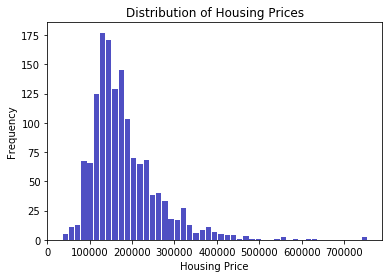

In [189]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(x=data['SalePrice'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Housing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Housing Prices')
plt.show()

In [312]:
data.shape

(1460, 79)

## High Correlations
* YearBuilt x GarageYrBlt
* GrLivArea x TotRmsAbvGrd
* 1stFlrSF x TotalBsmt
* GarageCars X GarageArea

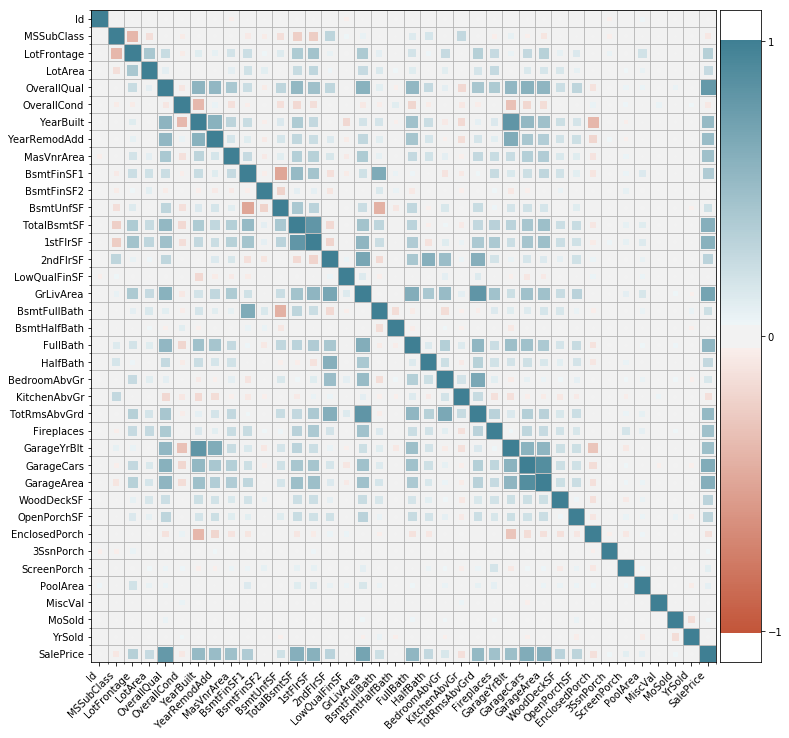

In [461]:
from heatmap import corrplot
plt.figure(figsize=(12, 12))
corrplot(data.corr(), size_scale=250, marker='s')

## Feature Engineering

Ideas - total number of bathrooms, total square feet, indicator for new, age instead of yr built

### Categorical

In [57]:
data.select_dtypes(include=["object"]).nunique()
# Convert 'MSSubClass', 'OverallQual', 'OverallCond' to categorical

MSZoning              5
Street                2
Alley                 2
LotShape              4
LandContour           4
Utilities             2
LotConfig             5
LandSlope             3
Neighborhood         25
Condition1            9
Condition2            8
BldgType              5
HouseStyle            8
RoofStyle             6
RoofMatl              8
Exterior1st          15
Exterior2nd          16
MasVnrType            4
ExterQual             4
ExterCond             5
Foundation            6
BsmtQual              4
BsmtCond              4
BsmtExposure          4
BsmtFinType1          6
BsmtFinType2          6
Heating               6
HeatingQC             5
CentralAir            2
Electrical            5
KitchenQual           4
Functional            7
FireplaceQu           5
GarageType            6
GarageFinish          3
GarageQual            5
GarageCond            5
PavedDrive            3
PoolQC                3
Fence                 4
MiscFeature           4
SaleType        

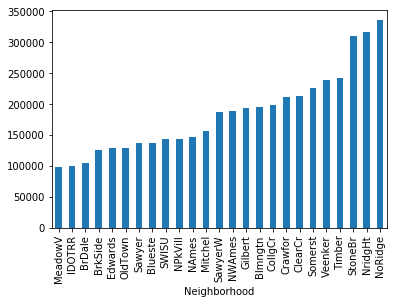

In [19]:
data.groupby(['Neighborhood'])['SalePrice'].mean().sort_values().plot.bar()

In [133]:
def neighborhood_level(df):
    if df['Neighborhood'] in ('StoneBr', 'NridgHt', 'NoRidge'):
        return 'Upper'
    elif df['Neighborhood'] in ('Timber', 'Veenker', 'Somerst', 'ClearCr',
                               'Crawfor', 'CollgCr', 'Blmngtn', 'Gilbert',
                               'NWAmes', 'SawyerW'):
        return 'Upper Middle'
    elif df['Neighborhood'] in ('Mitchel', 'NWAmes', 'NPkVill', 'SWISU',
                               'Sawyer', 'OldTown', 'Edwards', 'BrkSide',
                               'NAmes', 'Blueste'):
        return 'Lower Middle'
    elif df['Neighborhood'] in ('BrDale', 'IDOTRR', 'MeadowV'):
        return 'Lower'
    
data['NeighborhoodLevel'] = data.apply(neighborhood_level, axis=1)
data = data.drop(columns=['Neighborhood'])

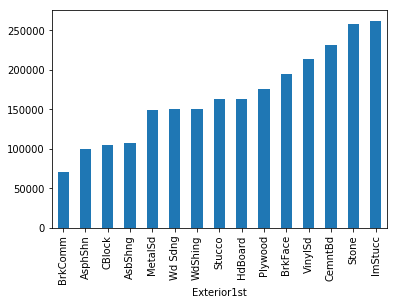

In [60]:
data.groupby(['Exterior1st'])['SalePrice'].mean().sort_values().plot.bar()

In [134]:
def exterior_level(df):
    if df['Exterior1st'] in ('ImStucc', 'Stone', 'CemntBd', 'VinylSd', 'BrkFace'):
        return 'high'
    elif df['Exterior1st'] in ('Plywood', 'HdBoard', 'Stucco', 'WdShing', 'Wd Sdng', 'MetalSd'):
        return 'middle'
    elif df['Exterior1st'] in ('AsbShng', 'CBlock', 'AsphShn', 'BrkComm'):
        return 'low'

data['ExteriorLevel'] = data.apply(exterior_level, axis=1)
data = data.drop(columns=['Exterior1st', 'Exterior2nd'])

### Continuous

In [135]:
data['TotalBath'] = data['BsmtFullBath'] + data['BsmtHalfBath'] + \
                    data['FullBath'] + data['HalfBath']
   
data['TotalSqFeet'] = data['GrLivArea'] + data['TotalBsmtSF']

data['NewHouse'] = np.where(data['YearBuilt'] == data['YearRemodAdd'], 1, 0)
data = data.drop(columns=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'GrLivArea', 'TotalBsmtSF'])

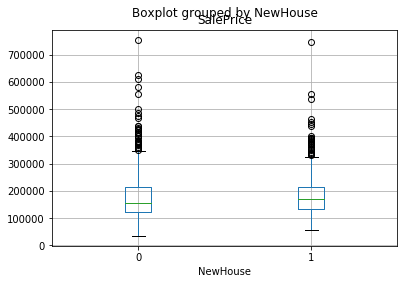

In [99]:
data.boxplot(column='SalePrice', by='NewHouse')

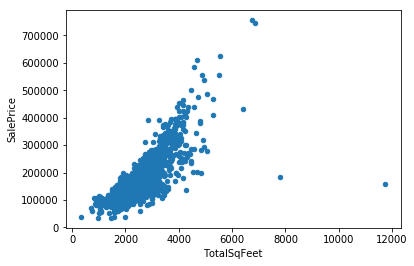

In [105]:
data.plot.scatter(x='TotalSqFeet', y='SalePrice')

In [106]:
# Outliers
data[(data['SalePrice'] < 300000) & (data['TotalSqFeet'] > 7000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,ExteriorCount,NewHouse,NeighborhoodLevel,ExteriorLevel,TotalBath,TotalSqFeet
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,2007,New,Partial,184750,2,0,Lower Middle,high,5,7814
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,2008,New,Partial,160000,1,1,Lower Middle,middle,5,11752


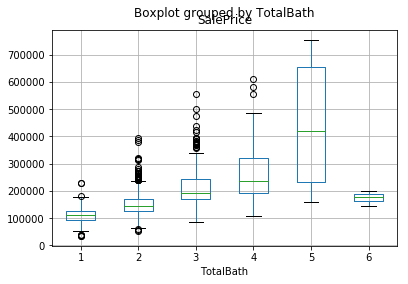

In [108]:
data.boxplot(column='SalePrice', by='TotalBath')

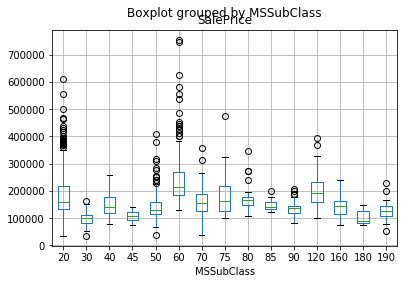

In [114]:
data.boxplot(column='SalePrice', by='MSSubClass')

In [117]:
data.groupby(['OverallCond'])['OverallCond'].count()

OverallCond
1      1
2      5
3     25
4     57
5    821
6    252
7    205
8     72
9     22
Name: OverallCond, dtype: int64

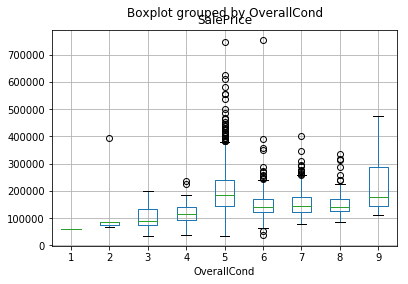

In [119]:
data.boxplot(column='SalePrice', by='OverallCond')

In [120]:
def condition_level(df):
    if df['OverallCond'] > 4:
        return 'good'
    else:
        return 'bad'

data['ConditionLevel'] = data.apply(condition_level, axis=1)
data = data.drop(columns=['OverallCond'])

In [465]:
Garage = data[['GarageType', 'GarageYrBlt', 'GarageFinish',
           'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2,548,TA,TA
1,Attchd,1976.0,RFn,2,460,TA,TA
2,Attchd,2001.0,RFn,2,608,TA,TA
3,Detchd,1998.0,Unf,3,642,TA,TA
4,Attchd,2000.0,RFn,3,836,TA,TA
5,Attchd,1993.0,Unf,2,480,TA,TA
6,Attchd,2004.0,RFn,2,636,TA,TA
7,Attchd,1973.0,RFn,2,484,TA,TA
8,Detchd,1931.0,Unf,2,468,Fa,TA
9,Attchd,1939.0,RFn,1,205,Gd,TA


## Missing Values

In [137]:
data.isnull().sum()[data.isnull().sum() > 0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [136]:
data['LotFrontage'] = data['LotFrontage'].fillna(0)
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(X['YearBuilt']) #group and make categorical

## Train Model

In [186]:
from sklearn.model_selection import train_test_split

y = data['SalePrice']
X = data.drop(['Id', 'SalePrice'], axis=1)

test_size = .3
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size)

In [143]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

numeric_features = list(X.select_dtypes(exclude=['object']).columns)
numeric_features = [e for e in numeric_features if e 
                    not in ('MSSubClass')]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_features = list(X.select_dtypes(include=['object']).columns)
categorical_features.extend(['MSSubClass'])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

## Grid Search and CV

In [184]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_log_error, r2_score
import xgboost as xgb

#xgboost = xgb.XGBRegressor(max_depth=4,
#                           colsample_bytree=0.6,
#                           subsample=0.8,
#                           reg_alpha=110,
#                           learning_rate=0.005,
#                           n_estimators=6000,
#                           nthread=4, seed=27)

xgboost = xgb.XGBRegressor(max_depth=3,
                           min_child_weight=2,
                           gamma=0,
                           colsample_bytree=0.85,
                           subsample=0.95,
                           reg_alpha=100,
                           reg_lambda=1,
                           learning_rate=0.001,
                           n_estimators=50000,
                           nthread=4, seed=27)

param_grid1 = {
    "max_depth":range(3,10,2),
    'min_child_weight':range(1,6,2)
}

param_grid2 = {
    "max_depth":[2,3,4],
    'min_child_weight':[2,3,4]
}

param_grid3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

param_grid4 = {
 'subsample':[i/10.0 for i in range(6,11)],
 'colsample_bytree':[i/10.0 for i in range(6,11)]
}

param_grid5 = {
 'subsample':[i/100.0 for i in range(85,100,5)],
 'colsample_bytree':[i/100.0 for i in range(85,100,5)]
}

param_grid6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

param_grid7 = {
 'reg_lambda':[1e-5, 0.1, 1, 10, 100]
}

param_grid8 = {
    "n_estimators": [1000, 5000, 10000],
    "learning_rate": [0.1, 0.05, 0.01],
}

param_grid9 = {
    "n_estimators": [5000, 50000, 100000],
    "learning_rate": [0.01, 0.001, 0.0001],
}


pipe = Pipeline(steps=[('preprocessor', preprocessor), 
                      ('xgboost', xgboost)])
def rmsle(y, y0):
    return -np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y0))))

search = GridSearchCV(xgboost, param_grid9, cv=5,
                      scoring=make_scorer(rmsle))


In [181]:
search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.85, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=3,
       min_child_weight=2...ht=None, seed=27, subsample=0.95,
       tree_method=None, validate_parameters=None, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5000, 50000, 100000], 'learning_rate': [0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(rmsle), verbose=0)

In [182]:
#rmsle
search.cv_results_['mean_test_score']

array([-0.12669446, -0.12787676, -0.12787672, -0.13811218, -0.12663687,
       -0.12750613, -0.93347343, -0.13808679, -0.12844296])

In [183]:
search.best_params_

{'learning_rate': 0.001, 'n_estimators': 50000}

## Validation

In [187]:
xgboost.fit(preprocessor.fit_transform(X_train), y_train)
validation = xgboost.predict(preprocessor.transform(X_val))
rmsle(validation, np.array(y_val))

-0.13115284973782426

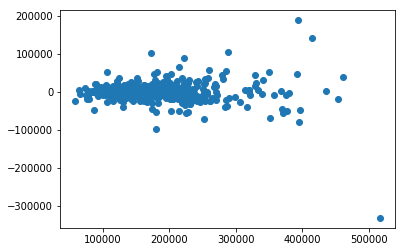

In [190]:
plt.scatter(validation, y_val - validation)
plt.show()

## Feature Importance

In [191]:
xgboost.fit(preprocessor.fit_transform(X), y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.85, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.001, max_delta_step=0, max_depth=3,
       min_child_weight=2, missing=nan, monotone_constraints='()',
       n_estimators=50000, n_jobs=4, nthread=4, num_parallel_tree=1,
       objective='reg:squarederror', random_state=27, reg_alpha=100,
       reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.95,
       tree_method='exact', validate_parameters=1, verbosity=None)

In [298]:
col_names = numeric_features + preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names(categorical_features).tolist()
keys = list(xgboost.get_booster().get_score(importance_type="gain").keys())
col_index = [int(key[1:]) for key in keys]
names = [col_names[i] for i in col_index]

values = list(xgboost.get_booster().get_score(importance_type="gain").values())

feature_importance = pd.DataFrame(data=values, index=names, columns=["score"]).sort_values(by = "score", ascending=False)
feature_importance

,score
OverallQual,1.567089e+11
TotalSqFeet,1.005169e+11
BsmtQual_Ex,8.987956e+10
NeighborhoodLevel_Lower Middle,8.030772e+10
GarageCars,5.863991e+10
KitchenQual_TA,4.366206e+10
NeighborhoodLevel_Upper,3.574277e+10
TotalBath,3.368027e+10
CentralAir_Y,2.415179e+10
CentralAir_N,2.121860e+10


In [297]:
def no_importance(lst):
    name_index = [x for x in range(lst[0], lst[-1]+1) if x not in lst]
    return [col_names[i] for i in name_index]
    
no_importance(sorted(col_index))

['Utilities_AllPub',
 'Utilities_NoSeWa',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_PosA',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_1.5Unf',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_WdShake',
 'ExterCond_Ex',
 'ExterCond_Po',
 'BsmtCond_Po',
 'BsmtCond_missing',
 'BsmtExposure_missing',
 'BsmtFinType1_missing',
 'BsmtFinType2_missing',
 'Heating_Floor',
 'Heating_OthW',
 'Heating_Wall',
 'HeatingQC_Po',
 'Electrical_FuseP',
 'Electrical_Mix',
 'Electrical_missing',
 'Functional_Sev',
 'GarageFinish_missing',
 'GarageQual_Ex',
 'GarageQual_Po',
 'GarageQual_missing',
 'GarageCond_Ex',
 'GarageCond_Po',
 'GarageCond_missing',
 'PoolQC_Ex',
 'PoolQC_Fa',
 'Fence_MnWw',
 'MiscFeature_Gar2',
 'MiscFeature_Othr',
 'MiscFeature_TenC',
 'MiscFeature_missing',
 'SaleType_Con',
 'SaleCondition_AdjLand',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_160',
 'MSS

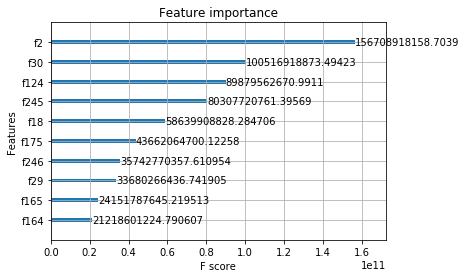

In [206]:
xgb.plot_importance(xgboost,
                    importance_type="gain",
                    max_num_features=10)
plt.show()

In [209]:
keys = list(xgboost.get_booster().get_score(importance_type="gain").keys())
values = list(xgboost.get_booster().get_score(importance_type="gain").values())

feature_importance = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)

In [210]:
feature_importance

,score
f2,1.567089e+11
f30,1.005169e+11
f124,8.987956e+10
f245,8.030772e+10
f18,5.863991e+10
f175,4.366206e+10
f246,3.574277e+10
f29,3.368027e+10
f165,2.415179e+10
f164,2.121860e+10


In [192]:
test = pd.read_csv('test.csv')
test['NeighborhoodLevel'] = test.apply(neighborhood_level, axis=1)
test['ExteriorLevel'] = test.apply(exterior_level, axis=1)
test['ConditionLevel'] = test.apply(condition_level, axis=1)
test['TotalBath'] = test['BsmtFullBath'] + test['BsmtHalfBath'] + \
                    test['FullBath'] + test['HalfBath']   
test['TotalSqFeet'] = test['GrLivArea'] + test['TotalBsmtSF']
test['NewHouse'] = np.where(test['YearBuilt'] == test['YearRemodAdd'], 1, 0)

In [193]:
X_test = preprocessor.transform(test)

prediction = xgboost.predict(X_test)
submission = pd.DataFrame({'Id':test['Id'], 'SalePrice':prediction})

submission.to_csv('Predictions/HousingPrices5.csv', index=False)